In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import networkx as nx
import matplotlib.pyplot as plt
from scipy import stats
import warnings
from pyvinecopulib import Bicop, BicopFamily

In [2]:
tickers = {
    "BTC": "BTC-USD",
    "ETH": "ETH-USD",
    "NASDAQ-100 ETF": "QQQ",
    "Silver (spot)": "XAG-USD",
    "High-Yield Bond ETF": "HYG",

}

df = yf.download(list(tickers.values()), start="2023-01-04", end="2023-04-04")["Close"]
df.columns = list(tickers.keys())
returns = np.log(df).diff().dropna()

C:\Users\susha\AppData\Local\Temp\ipykernel_191268\3049230534.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(list(tickers.values()), start="2023-01-04", end="2023-04-04")["Close"]
[*********************100%***********************]  5 of 5 completed


In [3]:
returns

,BTC,ETH,NASDAQ-100 ETF,Silver (spot),High-Yield Bond ETF
Date,,,,,
2023-01-05,-0.001573,-0.004857,-0.002012,-0.015778,0.000385
2023-01-06,0.006821,0.015033,0.014133,0.027228,0.000000
2023-01-10,0.014418,0.011322,-0.001188,0.008429,0.000000
2023-01-11,0.027621,0.037697,0.006583,0.017152,0.000000
2023-01-12,0.050803,0.021389,0.005626,0.005390,-0.060712
2023-01-13,0.053649,0.023473,0.000000,0.006857,0.047731
2023-01-18,-0.022593,-0.033953,0.001178,-0.013085,-0.016580
2023-01-19,0.019055,0.024153,-0.005902,-0.009873,0.000000
2023-01-20,0.072685,0.066767,0.001971,0.026999,-0.031892


In [4]:
#probability integrity transform
def pseudo_obs(series):
    r = stats.rankdata(series, method="average")
    return r / (len(series) + 1.0)

U = returns.apply(pseudo_obs, axis=0)

In [5]:
def fit_bb7_conditional_prob(u1, u2, alpha=0.05, mc_N=20000, family_force='bb7'):
    """
    Fit BB7 to (u1,u2) pseudo-observations (numpy arrays).
    Returns conditional probability p = C(alpha,alpha)/alpha.
    If BB7 fit fails, falls back to Bicop.select over families and uses best model.
    """
    # Prepare input for pyvinecopulib: n x 2 numpy array
    data = np.column_stack([u1, u2]).astype(float)

    # small input checks
    if data.shape[0] < 50:
        # Not enough data for stable BB7 fit
        warnings.warn("Fitting on small sample (<50). Estimates may be noisy.")
    # Clip to (0,1) to avoid edge numerical problems
    data = np.clip(data, 1e-8, 1 - 1e-8)

    # Try to instantiate a BB7 bicop and fit with MLE
    try:
        # Bicop.from_family accepts family identifier; we can use BicopFamily.bb7 or string 'bb7'
        # Note: you can also set rotate=0 if you want no rotation
        bicop = Bicop.from_family("bb7")   # family 'bb7' (Joe-Clayton / BB7)
        bicop.fit(data)  # MLE fit (default controls)
    except Exception as e:
        # fallback: try to select best family automatically (this will try multiple families)
        warnings.warn(f"BB7 fit failed, falling back to automatic selection. Reason: {e}")
        bicop = Bicop.from_data(data)  # this will select/fit automatically with default controls
        try:
            bicop.select(data)  # explicit selection (family search)
        except Exception:
            # if select fails, keep the bicop fitted from from_data()
            pass

    # Evaluate C(alpha, alpha) using bicop.cdf
    u_query = np.array([[alpha, alpha]], dtype=float)
    try:
        # bicop.cdf returns a 1d array; use mc_N quasi MC samples for numerical integration if required
        C_aa = float(bicop.cdf(u_query, N=mc_N)[0])
    except Exception as e:
        # As a last resort, approximate C(u,u) by empirical count (consistent fallback)
        warnings.warn(f"bicop.cdf failed, using empirical fallback for C({alpha},{alpha}). Reason: {e}")
        mask = (u1 < alpha) & (u2 < alpha)
        C_aa = mask.sum() / len(u1)

    # compute conditional probability p = C(alpha,alpha)/alpha
    p = C_aa / alpha
    # Force [0,1] range numerically
    p = float(np.clip(p, 0.0, 1.0))

    # also return family name for diagnostics
    fam = bicop.family.name if hasattr(bicop.family, 'name') else str(bicop.family)
    return p, C_aa, fam

In [6]:
assets = U.columns.tolist()
n = len(assets)
alpha = 0.05
W = pd.DataFrame(np.zeros((n, n)), index=assets, columns=assets)
family_matrix = pd.DataFrame("", index=assets, columns=assets)

for i_idx, i in enumerate(assets):
    for j_idx, j in enumerate(assets):
        if i == j:
            continue
        u_i = U.iloc[:, i_idx].to_numpy()
        u_j = U.iloc[:, j_idx].to_numpy()
        p, C_aa, fam = fit_bb7_conditional_prob(u_i, u_j, alpha=alpha, mc_N=20000)
        W.loc[i, j] = p
        family_matrix.loc[i, j] = fam

print("Conditional tail-probability matrix P(i|j):\n", W.round(3))
print("\nFitted family matrix (per pair):\n", family_matrix)

C:\Users\susha\AppData\Local\Temp\ipykernel_191268\4055276143.py:13: UserWarning: Fitting on small sample (<50). Estimates may be noisy.
  warnings.warn("Fitting on small sample (<50). Estimates may be noisy.")
C:\Users\susha\AppData\Local\Temp\ipykernel_191268\4055276143.py:25: UserWarning: BB7 fit failed, falling back to automatic selection. Reason: from_family(): incompatible function arguments. The following argument types are supported:
    1. from_family(family: pyvinecopulib.BicopFamily = BicopFamily.indep, rotation: int = 0, parameters: numpy.ndarray[dtype=float64, shape=(*, *)] = array([], shape=(0, 0), dtype=float64), var_types: collections.abc.Sequence[str] = ['c', 'c']) -> pyvinecopulib.Bicop

Invoked with types: str
  warnings.warn(f"BB7 fit failed, falling back to automatic selection. Reason: {e}")
C:\Users\susha\AppData\Local\Temp\ipykernel_191268\4055276143.py:40: UserWarning: bicop.cdf failed, using empirical fallback for C(0.05,0.05). Reason: cdf(): incompatible funct

Conditional tail-probability matrix P(i|j):
                        BTC    ETH  NASDAQ-100 ETF  Silver (spot)  \
BTC                  0.000  0.833           0.000          0.000   
ETH                  0.833  0.000           0.000          0.000   
NASDAQ-100 ETF       0.000  0.000           0.000          0.417   
Silver (spot)        0.000  0.000           0.417          0.000   
High-Yield Bond ETF  0.000  0.000           0.000          0.000   

                     High-Yield Bond ETF  
BTC                                  0.0  
ETH                                  0.0  
NASDAQ-100 ETF                       0.0  
Silver (spot)                        0.0  
High-Yield Bond ETF                  0.0  

Fitted family matrix (per pair):
                          BTC      ETH NASDAQ-100 ETF Silver (spot)  \
BTC                            gumbel        clayton       clayton   
ETH                   gumbel                 clayton         frank   
NASDAQ-100 ETF       clayton  clayton      

In [7]:
G = nx.DiGraph()
G.add_nodes_from(assets)
for i in assets:
    for j in assets:
        if i == j:
            continue
        w = W.loc[i, j]
        # optional threshold to reduce noise
        if w > 0.01:
            G.add_edge(j, i, weight=float(w))

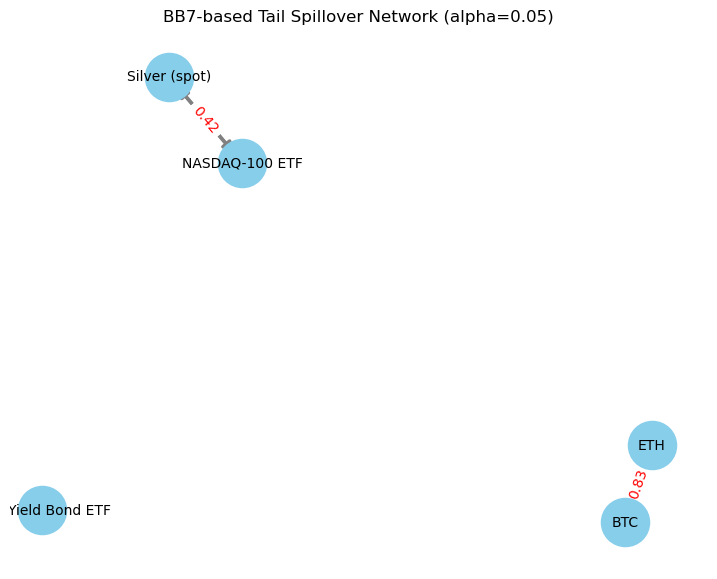

In [8]:
plt.figure(figsize=(9,7))
pos = nx.spring_layout(G, seed=2)
weights = [d['weight'] for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=1200)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, edge_color='gray',
                       arrowsize=16,
                       width=[max(0.5, 6*w) for w in weights])
edge_labels = {(u,v): f"{d['weight']:.2f}" for u,v,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title(f"BB7-based Tail Spillover Network (alpha={alpha})")
plt.axis('off')
plt.show()

In [9]:
from numpy.linalg import eigvals

def connectedness_index(W, alpha = 0.05):
    J = W.copy()                    # DataFrame NxN where J[i,j] = C_aa(i,j)
    np.fill_diagonal(J.values, alpha)  # set diagonal to marginal P(U_i<=alpha) (or empirical)
    return 100.0 * (J.values.sum() - np.trace(J.values)) / (J.values.sum() + 1e-12)

def spectral_radius(W):
    A = (W + W.T) / 2.0
    eigs = eigvals(A)
    return float(np.max(eigs.real))

rho = spectral_radius(W)

# Standardize and compute SRI
#df['zCI'] = (df['CI'] - df['CI'].mean()) / df['CI'].std(ddof=0)
#df['zRho'] = (df['Rho'] - df['Rho'].mean()) / df['Rho'].std(ddof=0)
#df['SRI'] = df['zCI'] * df['zRho']

#df[['CI','Rho','SRI']].plot(title='Unified Systemic Risk Index (SRI)')


In [10]:
rho

0.8333333333333333

In [21]:
df.loc['2023-01-04'].mean()

3688.8420801637694

In [27]:
df.loc['2023-04-03'].mean()

5996.0798353198215